# 자연어처리 시작하기 - 전처리, 토큰화, 명사추출
* soynlp(https://github.com/lovit/soynlp)로 토큰화하고 명사를 추출해 워드클라우드 그려보기

#!pip install soynlp JPype1 konlpy

!pip show soynlp

In [1]:
import re
from pandas import read_excel

from msba import posts as p
from msba import stopwords as stopswords

## 키워드/관심어 불러오기

In [2]:
def interested_words():
    # 핵심단어 읽어 오기
    my_sheet = '소비키워드'
    keywords_filename = 'deskresearch_.xlsx'
    df = read_excel(keywords_filename, sheet_name = my_sheet, header=1) # index_col='번호'
    keywords = df['핵심단어']
    subkeywords = df['대체어']
    interested_words = df['키워드']
    return keywords, subkeywords, interested_words

keywords, subkeywords, interested_words = interested_words()

for keyword, subkeyword, interested_word in zip(keywords, subkeywords, interested_words):
    subkeyword = subkeyword.replace(" ", "").replace(",","|")
    interested_word = subkeyword + "|" + interested_word.replace(" ", "").replace(",","|")
#     print(keyword, " : " , subkeyword, interested_word)

# 자신의 관심사에 맞는 단어로 데이터 가져오기

In [3]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    res = ''.join([i for i in text if not i.isdigit()]) 
    return text

In [4]:
for keyword, subkeyword, interested_word in zip(keywords, subkeywords, interested_words):
    
    df = p.readall(keyword.replace(" ",""))
    df = df[ (df['date'] >= '2019-07-01') & (df['date'] < '2020-07-01')]
    df = df.drop_duplicates()

    sentences = df['title'].apply(preprocessing) + df['content'].apply(preprocessing)

865 865 865
730 730 730
541 541 541
1106 1106 1106
631 631 631
642 642 642
636 636 636
1036 1036 1036
888 888 888
358 358 358
798 798 798
1255 1255 1255
303 303 303
47 47 47
471 471 471
1261 1261 1261
335 335 335
634 634 634
39 39 39
828 828 828
1265 1265 1265
830 830 830
1215 1215 1215
795 795 795
13 13 13
1161 1161 1161
1292 1292 1292
711 711 711
491 491 491
1158 1158 1158
1161 1161 1161
621 621 621
664 664 664
613 613 613
555 555 555


In [5]:
type(sentences)

pandas.core.series.Series

In [6]:
sentences

4      설레는 여행길에서 결코 지나칠 수 없는설레는 여행길에서 결코 지나칠 수 없는사막의 ...
6      경북 영주 '안심식당'이자 '착한가격업소'에서 직접 식사한 후기코로나19 확산을 억...
8      팔공산 백숙 맛집, 안심식당, 부모님과 몸보신 식사안녕하세요^^ 김콩룸입니다~요즘 ...
29     팔공산 능이백숙 잘하는 안심식당 토종닭에 내가 반했어안녕하세요,웬디여요:)수능날이라...
30     연수구가 ‘코로나19’ 장기화에 따른 골목상권을 보호하고연수구가 ‘코로나19’ 장기...
                             ...                        
496    Photo by 정안정 on March 25, 2020. 이미지: 문구: '정 정안...
502    Photo by 민디 on March 20, 2020. 이미지: 사람 1명 이상, ...
503    Photo by 담양군의회 on March 31, 2020. 이미지: 사람 4명, ...
517    Photo by 🏸✈️🐶 on February 29, 2020. 사진 설명이 없습니다..
520    Photo by 이명예 on March 24, 2020. 이미지: 문구: '안심식당...
Length: 1558, dtype: object

In [21]:
for word in ['박근혜', '문재인', '최순실', '아이오아이', '트와이스', '군사', '외교']:
    print(word, corpusbased_extractor.frequency(word))

NameError: name 'corpusbased_extractor' is not defined

In [7]:
import sys
import soykeyword

In [8]:
from soynlp.noun import LRNounExtractor

noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (14431, 8235) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 2818 nouns are extracted


In [20]:
import pickle

with open('params', 'rb') as f:
    params = pickle.load(f)

# x = params['nouns.keys()']

FileNotFoundError: [Errno 2] No such file or directory: 'params'

In [11]:
len(nouns.keys())

2818

In [12]:
from soykeyword.lasso import LassoKeywordExtractor

lassobased_extractor = LassoKeywordExtractor(
    costs=[500, 200, 100, 50, 10, 5, 1, 0.1],
    min_tf=20, 
    min_df=10
)

lassobased_extractor.train(x)
keywords = lassobased_extractor.extract_from_word(
    5537,
    min_num_of_keywords=30
)

keywords[:10]

AttributeError: 'dict_keys' object has no attribute 'shape'

In [16]:
x = nouns

In [17]:
from soykeyword.lasso import LassoKeywordExtractor

lassobased_extractor = LassoKeywordExtractor(
    costs=[500, 200, 100, 50, 10, 5, 1, 0.1],
    min_tf=20, 
    min_df=10
)

lassobased_extractor.train(x, index2word)

NameError: name 'index2word' is not defined

In [ ]:
documents = lassobased_extractor.get_document_index('아이오아이')

In [ ]:
keywords = lassobased_extractor.extract_from_docs(
    documents,
    min_num_of_keywords=30
)

keywords

In [9]:
!pip install soykeyword

  Using cached soykeyword-0.0.14-py3-none-any.whl (9.7 kB)


In [10]:
from soykeyword.lasso import LassoKeywordExtractor

lassobased_extractor = LassoKeywordExtractor(
    costs=[500, 200, 100, 50, 10, 5, 1, 0.1],
    min_tf=20, 
    min_df=10
)

lassobased_extractor.train(sentences)
keywords = lassobased_extractor.extract_from_word(
    5537,
    min_num_of_keywords=30
)

keywords[:10]

ValueError: not enough values to unpack (expected 2, got 1)

# 명사 추출 soynlp

In [6]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

/opt/conda/lib/python3.8/site-packages/soynlp/tokenizer/_tokenizer.py:19: FutureWarning: Possible nested set at position 13
  ('english & latin', re.compile(u"[a-zA-ZÀ-ÿ]+[[`']?s]*|[a-zA-ZÀ-ÿ]+", re.UNICODE))


In [7]:
%%time
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract(min_noun_score=0.99,
    min_noun_frequency=20)
nouns

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (3261, 1918) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 264 nouns are extracted
CPU times: user 644 ms, sys: 17.9 ms, total: 662 ms
Wall time: 651 ms


{'강화': NounScore_v1(frequency=14, score=0.9934654545454545, known_r_ratio=1.0),
 '바람': NounScore_v1(frequency=4, score=0.9996349999999999, known_r_ratio=0.75),
 '평가': NounScore_v1(frequency=14, score=0.9996444999999999, known_r_ratio=1.0),
 '언급': NounScore_v1(frequency=10, score=0.9971135, known_r_ratio=1.0),
 '발생': NounScore_v1(frequency=3, score=0.999513, known_r_ratio=1.0),
 '모두': NounScore_v1(frequency=25, score=0.9986005, known_r_ratio=0.4),
 '현재': NounScore_v1(frequency=17, score=0.99961, known_r_ratio=0.6666666666666666),
 '지난': NounScore_v1(frequency=26, score=0.995316, known_r_ratio=0.5),
 '어른': NounScore_v1(frequency=5, score=0.999185, known_r_ratio=0.2),
 '선도': NounScore_v1(frequency=9, score=0.997334, known_r_ratio=0.07142857142857142),
 '전국': NounScore_v1(frequency=71, score=0.9997417058823528, known_r_ratio=0.5151515151515151),
 '고객': NounScore_v1(frequency=47, score=0.9991850000000001, known_r_ratio=0.08823529411764706),
 '사태': NounScore_v1(frequency=23, score=0.99929700

In [39]:
from msba import stopwords

# word = keywords
stopwords = stopswords.stopwords
stopwords_kr = ['하지만', '그리고', '그런데', '저는','제가','있습니다', '않습니다'
                '그럼', '이런', '저런', '합니다', '있어요',
                '많은', '많이', '정말', '너무', 'https', 'Coupang', 'Coupa', 'ng', '1인', '미디어'] + stopwords
# print(stopwords_kr)

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600 ):
    wordcloud = WordCloud(
                        font_path = './Library/Fonts/NanumBarunGothic.ttf', 
                        stopwords = stopwords_kr,
                        background_color = backgroundcolor, 
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show() 

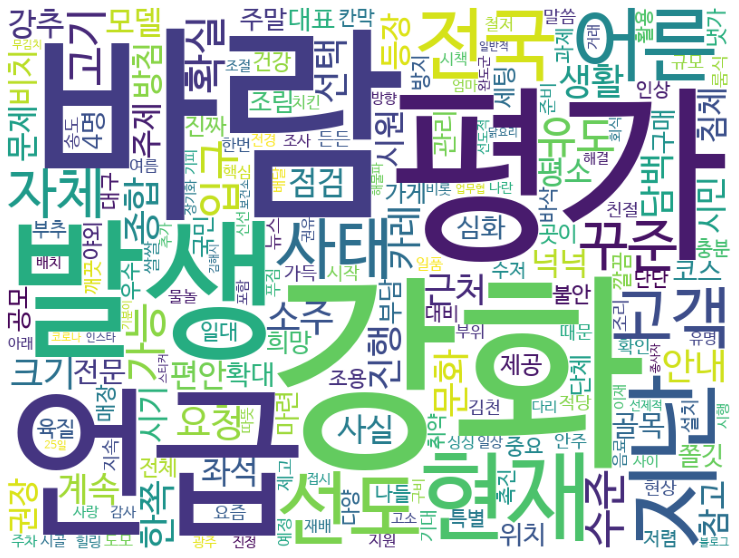

CPU times: user 1.2 s, sys: 94.7 ms, total: 1.3 s
Wall time: 2.12 s


In [41]:
# 추출된 명사를 찍어봅니다.
%time displayWordCloud(' '.join(nouns))

<function dict.values>

In [42]:
print(keyword, " : " , subkeyword, interested_word)

안심식당  :  루프탑|프라이빗룸 루프탑|프라이빗룸|안심식당|루프탑|야외석|공원피크닉|근거리소비|슬세권|프라이빗룸


## Konlpy 

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [45]:
dataset = []
for sentence in sentences:
    dataset.append(kkma.nouns(sentence))

In [46]:
dataset = [[y for y in x if not len(y)==1] for x in dataset]   # 2자 이상
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자 판별
dataset[:10]

[['여행길',
  '사막',
  '오아시스',
  '존재',
  '고속도로',
  '휴게소',
  '섬진',
  '섬진강',
  '플레이스',
  '복합',
  '복합문화공간',
  '문화',
  '공간',
  '진화',
  '섬진강',
  '섬진강휴게소',
  '기존',
  '휴게',
  '기능',
  '지역',
  '특산물',
  '판매',
  '진흥',
  '환승기능',
  '제공',
  '뒤편',
  '경치',
  '운전',
  '피로',
  '섬진강휴게소',
  '진짜',
  '거리',
  '뒷길',
  '제철',
  '별미',
  '집들이',
  '자리',
  '이곳',
  '맛집',
  '요즘',
  '벚굴',
  '백합',
  '재첩',
  '매운탕',
  '수륙',
  '수륙진미',
  '진미',
  '손님',
  '광양',
  '광양시',
  '진월',
  '진월면',
  '신아리',
  '아리',
  '위치',
  '남해',
  '남해고속도로',
  '겸환승휴게소',
  '영호남',
  '호남',
  '경계',
  '전국',
  '최초',
  '고속버스',
  '환승',
  '시외버스',
  '시내버스',
  '환승휴게소',
  '운영',
  '매표소',
  '구입',
  '사전',
  '도착',
  '시간',
  '출발',
  '출발시간',
  '조절',
  '여유',
  '휴식',
  '부산',
  '부산방향',
  '방향',
  '순천',
  '순천방향',
  '육교',
  '연결',
  '육교',
  '서면',
  '아래',
  '한눈',
  '조망',
  '봄꽃',
  '물안개',
  '강줄기',
  '푸르름',
  '미소',
  '향기',
  '준공',
  '기념탑',
  '여성',
  '월계관',
  '모습',
  '작품',
  '작품명',
  '승리',
  '여신상',
  '소공원',
  '공원',
  '날씨',
  '공기',
  '최고',
  '방면',
  '테마',
  '테마공원',
  '조성',
  '동백꽃',
  '엔

In [47]:
# type(len(dataset))
text = ""
for words in dataset:
#     print (line)
    for word in words:
        text = text + " "+ word

In [67]:
for word in text.split(" "):
    text = text + " "+ word

In [66]:
#%time displayWordCloud(text)

# Word2vec

In [60]:
# Word2Vec 불러오기
from gensim.models.word2vec import Word2Vec

In [61]:
def remove_stopwords(s):
    result = [] 
    for w in s: 
        if w not in stopwords_kr: 
            result.append(w) 
    return result

dataset_sw = remove_stopwords(dataset)

In [62]:
# 모형 구축
model = Word2Vec(dataset_sw,         # 불용어 처리한 후 
                sg=1,                # skip-gram 적용: 중심 단어로 주변 단어를 예측
                window=5,            # 중심 단어로부터 좌우 5개 단어까지 학습에 적용
                min_count=1          # 전체문서에서 최소 1회 이상 출현단어로 학습 진행
                )
model.init_sims(replace=True)

In [63]:
w2c = dict()
for item in model.wv.vocab:
    w2c[item]=model.wv.vocab[item].count

In [64]:
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))

### 출현빈도 (내림차순)

In [68]:
print(keyword, " : " , subkeyword, interested_word)

안심식당  :  루프탑|프라이빗룸 루프탑|프라이빗룸|안심식당|루프탑|야외석|공원피크닉|근거리소비|슬세권|프라이빗룸


In [65]:
w2cSorted

{'식당': 769,
 '안심': 767,
 '안심식당': 504,
 '지정': 380,
 '운영': 365,
 '코로나': 315,
 '도민': 308,
 '음식점': 291,
 '코로나19': 271,
 '지역': 263,
 '도민안심식당': 244,
 '확산': 211,
 '활성화': 210,
 '경제': 166,
 '모범': 163,
 '개소': 151,
 '외식': 150,
 '방역': 148,
 '모범음식점': 141,
 '지역경제': 137,
 '선정': 135,
 '위생': 128,
 '이용': 126,
 '업소': 125,
 '연수': 124,
 '표시': 101,
 '식사': 99,
 '마스크': 98,
 '방문': 93,
 '위축': 92,
 '차단': 90,
 '투표': 86,
 '테이블': 84,
 '거리': 83,
 '음식': 83,
 '사회': 81,
 '소독': 80,
 '지역사회': 76,
 '방향': 74,
 '문화': 71,
 '연수구': 71,
 '식품': 70,
 '관리': 69,
 '상권': 67,
 '스티커': 67,
 '손님': 66,
 '진행': 65,
 '생활': 65,
 '가능': 64,
 '비치': 64,
 '안전': 63,
 '파티': 63,
 '침체': 62,
 '생과': 62,
 '경영난': 61,
 '사용': 61,
 '지자체': 61,
 '본격': 61,
 '위생과': 61,
 '파티파라나': 61,
 '파라나': 61,
 '소비자': 60,
 '사진': 59,
 '업체': 59,
 '부착': 58,
 '기자': 58,
 '제공': 57,
 '업계': 57,
 '관내': 56,
 '예방': 56,
 '소독제': 54,
 '일일': 54,
 '해당': 54,
 '구청': 54,
 '직원': 54,
 '한시적': 54,
 '인천': 53,
 '장기화': 52,
 '최선': 52,
 '희망': 52,
 '사회적': 51,
 '해소': 51,
 '종사자': 50,
 '연수구청': 50,
 '준수': 50,
 

In [70]:
type(w2cSorted)

dict

In [85]:
odf = pd.DataFrame.from_dict(list(w2cSorted.items()))

In [86]:
odf.columns=['단어', '빈도']

In [87]:
odf

,단어,빈도
0,식당,769
1,안심,767
2,안심식당,504
3,지정,380
4,운영,365
...,...,...
5617,세면대,1
5618,창선유람선식당,1
5619,외식업중앙회,1
5620,남해군지부,1


In [79]:
pattern = f'.*({interested_word}).*'
print (pattern)

.*(루프탑|프라이빗룸|안심식당|루프탑|야외석|공원피크닉|근거리소비|슬세권|프라이빗룸).*


In [89]:
odf = odf[odf['단어'].str.match(pattern)]

In [90]:
odf

,단어,빈도
2,안심식당,504
10,도민안심식당,244
1209,도민안심식당지정,3
1347,루프탑,3
1571,군민안심식당,2
1615,팔공산안심식당,2
1647,대구안심식당,2
1834,코로나안심식당,2
1879,시민안심식당,2
2046,안심식당임,2


### 어 100개 추출하여 50개 보기

In [ ]:
# 결과를 출력해 보면 불용어(STOPWORD)가 너무 많습니다.
%time displayWordCloud(' '.join(w2cSorted))

In [ ]:
# 가장 유사한 단어 100개
df_co = pd.DataFrame(model.wv.most_similar(keyword, topn=100), columns=['단어', '유사도'])
# 50개 보기
df_co.head(50)

### 출현 빈도

In [ ]:
statements = []
text = ""
for doc in lines:
    text = text + doc
    
statements = statements.append(text)